## Course: DSC550
## Assignment: 9.2 Project Milestone 4
## Name: Laura Hoffmann
## Date: 5/21/2021

#### Import the Libraries

In [1]:
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Milestone 3/4
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from sklearn import tree
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Milestone 1

In [2]:
# Read in the data
data = pd.read_csv('strokedata.csv')

In [3]:
# Rename columns to get a cleaner feel on the data set
data = data.rename(columns = {'id': 'ID', 'gender': 'Gender', 'age': 'Age', 'hypertension': 'Hypertension',
                             'heart_disease': 'Heart_Disease', 'ever_married': 'Married', 'work_type': 'Work',
                             'Residence_type': 'Residence', 'avg_glucose_level': 'Glucose', 'bmi': 'BMI',
                             'smoking_status': 'Smoking_Status', 'stroke': 'Stroke'}, inplace = False)

In [4]:
# Print the dimensions of the df
print('Dimensions:',data.shape)
# Print the first few rows of the df
data.head()

Dimensions: (5110, 13)


,Unnamed: 0,ID,Gender,Age,Hypertension,Heart_Disease,Married,Work,Residence,Glucose,BMI,Smoking_Status,Stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Find what types of variables are in the df
# Numerical data
print("Describe Data:")
print(round(data.describe(),2))
print("*"*70)
# Text data
print("Summarized Data:")
print(data.describe(include=['O']))

Describe Data:
       Unnamed: 0        ID      Age  Hypertension  Heart_Disease  Glucose  \
count     5110.00   5110.00  5110.00        5110.0        5110.00  5110.00   
mean      2554.50  36517.83    43.23           0.1           0.05   106.15   
std       1475.27  21161.72    22.61           0.3           0.23    45.28   
min          0.00     67.00     0.08           0.0           0.00    55.12   
25%       1277.25  17741.25    25.00           0.0           0.00    77.24   
50%       2554.50  36932.00    45.00           0.0           0.00    91.88   
75%       3831.75  54682.00    61.00           0.0           0.00   114.09   
max       5109.00  72940.00    82.00           1.0           1.00   271.74   

           BMI   Stroke  
count  4909.00  5110.00  
mean     28.89     0.05  
std       7.85     0.22  
min      10.30     0.00  
25%      23.50     0.00  
50%      28.10     0.00  
75%      33.10     0.00  
max      97.60     1.00  
************************************************

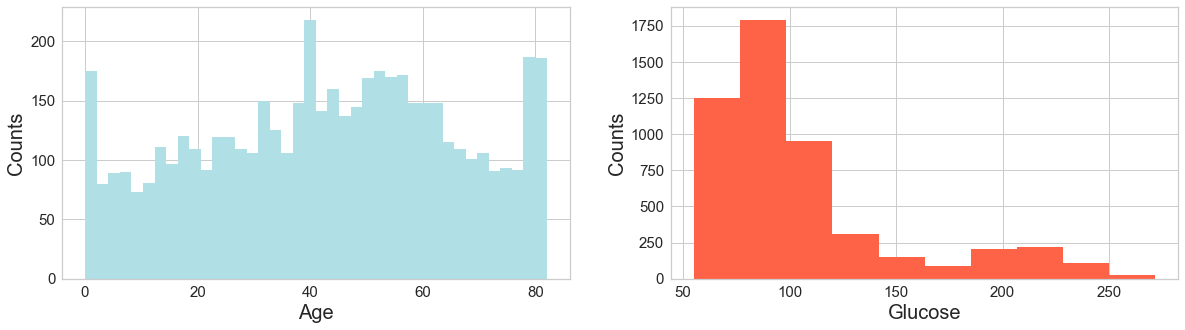

In [6]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# Make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# X axes, colors and bins
x_axes = ['Age', 'Glucose'] # Histograms for the columns Age and Glucose
colors = ['powderblue', 'tomato']
bins = [40, 10] # Respective bin sizes

# Make the graphs
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[x_axes[idx]].dropna(), bins=bins[idx], color=colors[idx])
    ax.set_xlabel(x_axes[idx], fontsize=20)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

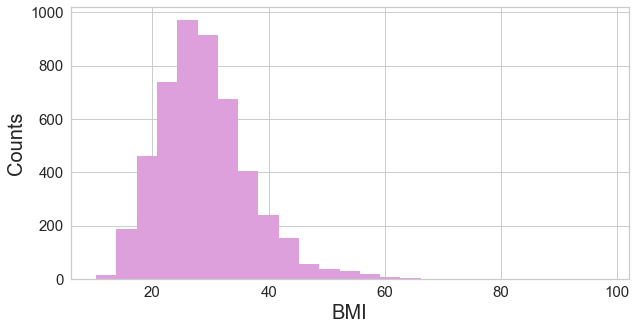

In [7]:
# Histogram for BMI
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['BMI'].dropna(), bins=25, color='plum')
plt.xlabel('BMI', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [8]:
strokebmi = data.loc[data['Stroke'].dropna() == 1, 'BMI']
nonstrokebmi = data.loc[data['Stroke'].dropna() == 0, 'BMI']

strokeglucose = data.loc[data['Stroke'].dropna() == 1, 'Glucose']
nonstrokeglucose = data.loc[data['Stroke'].dropna() == 0, 'Glucose']

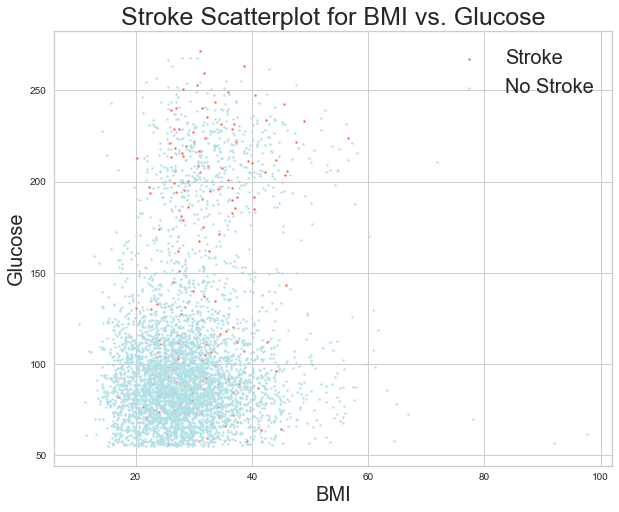

In [9]:
# Set plot size
plt.rcParams['figure.figsize'] = (10, 8)
fig = plt.figure()
ax = fig.add_subplot()

# Add data to the scatter plot for strokes and nonstrokes
plt.scatter(strokebmi, strokeglucose, color='tomato', label='Stroke', s=4)
plt.scatter(nonstrokebmi, nonstrokeglucose, color='powderblue', label='No Stroke', s=4)

# Labels
plt.title('Stroke Scatterplot for BMI vs. Glucose', fontsize=25)
plt.xlabel('BMI', fontsize=20)
plt.ylabel('Glucose', fontsize=20)
plt.legend(loc=1, fontsize=20)
plt.show()

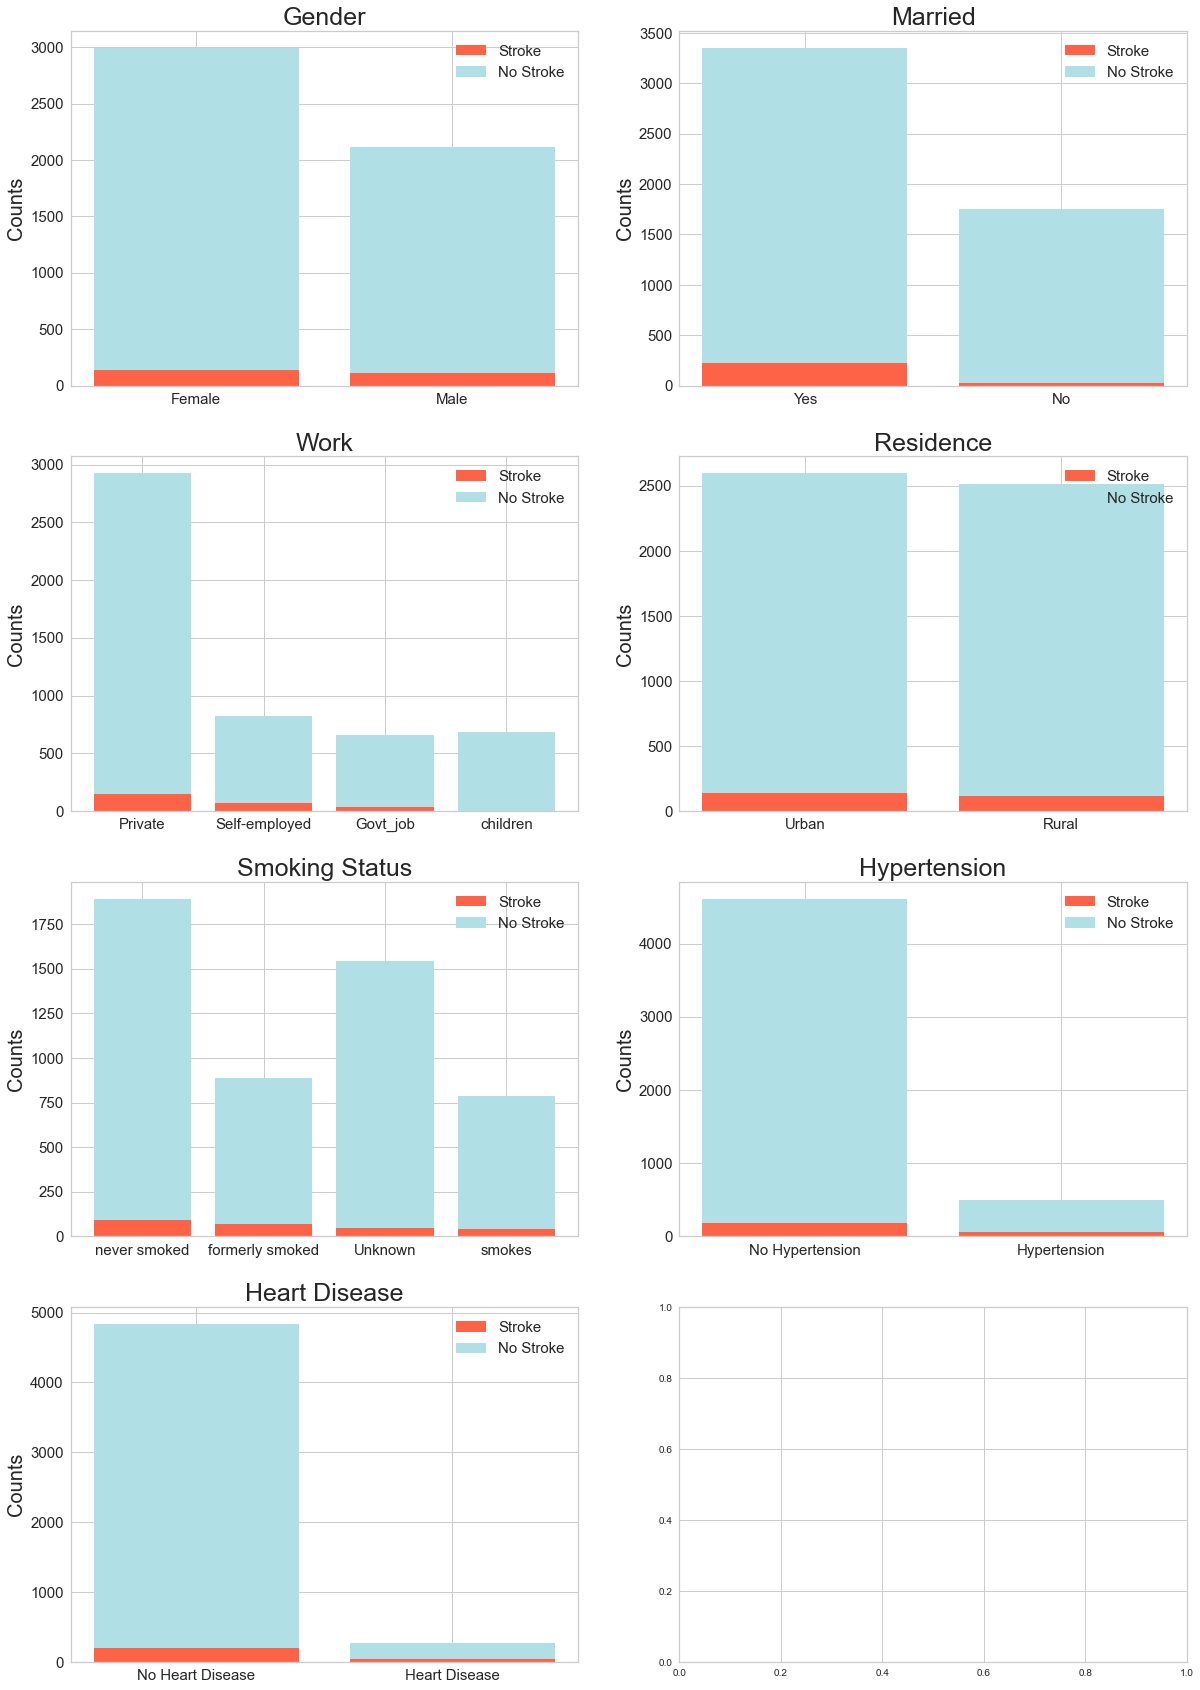

In [10]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 30)

# Make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 2)

# GENDER: Make the data read to feed into the visulizer
Stroke1 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==1]['Gender'].value_counts()
Stroke0 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==0]['Gender'].value_counts()
Stroke0 = Stroke0.reindex(index=Stroke1.index)

# GENDER: Make the bar plot
p1 = axes[0, 0].bar(Stroke1.index, Stroke1.values, color='tomato')
p2 = axes[0, 0].bar(Stroke0.index, Stroke0.values, color='powderblue', bottom=Stroke1.values)
axes[0, 0].set_title('Gender', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Stroke', 'No Stroke'), fontsize = 15)


# MARRIED: Make the data read to feed into the visulizer
Married1 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==1]['Married'].value_counts()
Married0 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==0]['Married'].value_counts()
Married0 = Married0.reindex(index = Married1.index)

# MARRIED: Make the bar plot
p3 = axes[0, 1].bar(Married1.index, Married1.values, color='tomato')
p4 = axes[0, 1].bar(Married0.index, Married0.values, color='powderblue', bottom=Married1.values)
axes[0, 1].set_title('Married', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Stroke', 'No Stroke'), fontsize = 15)


# WORK: Make the data read to feed into the visulizer
Work1 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==1]['Work'].value_counts()
Work0 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==0]['Work'].value_counts()
Work0 = Work0.reindex(index = Work1.index)

# WORK: Make the bar plot
p5 = axes[1, 0].bar(Work1.index, Work1.values, color='tomato')
p6 = axes[1, 0].bar(Work0.index, Work0.values, color='powderblue', bottom=Work1.values)
axes[1, 0].set_title('Work', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Stroke', 'No Stroke'), fontsize = 15)


# RESIDENCE: Make the data read to feed into the visulizer
Residence1 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==1]['Residence'].value_counts()
Residence0 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==0]['Residence'].value_counts()
Residence0 = Residence0.reindex(index = Residence1.index)

# RESIDENCE: Make the bar plot
p7 = axes[1, 1].bar(Residence1.index, Residence1.values, color='tomato')
p8 = axes[1, 1].bar(Residence0.index, Residence0.values, color='powderblue', bottom=Residence1.values)
axes[1, 1].set_title('Residence', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Stroke', 'No Stroke'), fontsize = 15)


# SMOKER: Make the data read to feed into the visulizer
Smoke1 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==1]['Smoking_Status'].value_counts()
Smoke0 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}})[data['Stroke']==0]['Smoking_Status'].value_counts()
Smoke0 = Smoke0.reindex(index = Smoke1.index)

# SMOKER: Make the bar plot
p9 = axes[2, 0].bar(Smoke1.index, Smoke1.values, color='tomato')
p10 = axes[2, 0].bar(Smoke0.index, Smoke0.values, color='powderblue', bottom=Smoke1.values)
axes[2, 0].set_title('Smoking Status', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p9[0], p10[0]), ('Stroke', 'No Stroke'), fontsize = 15)


# HYPERTENSION: Make the data read to feed into the visulizer
# Have to replace hypertension numbers (0=no hypertension, 1=hypertension)
Hypertension1 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}}).replace({'Hypertension': {0: 'No Hypertension', 1: 'Hypertension'}})[data['Stroke']==1]['Hypertension'].value_counts()
Hypertension0 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}}).replace({'Hypertension': {0: 'No Hypertension', 1: 'Hypertension'}})[data['Stroke']==0]['Hypertension'].value_counts()
Hypertension0 = Hypertension0.reindex(index = Hypertension1.index)

# HYPERTENSION: Make the bar plot
p11 = axes[2, 1].bar(Hypertension1.index, Hypertension1.values, color='tomato')
p12 = axes[2, 1].bar(Hypertension0.index, Hypertension0.values, color='powderblue', bottom=Hypertension1.values)
axes[2, 1].set_title('Hypertension', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)
axes[2, 1].legend((p11[0], p12[0]), ('Stroke', 'No Stroke'), fontsize = 15)


# HEART DISEASE: Make the data read to feed into the visulizer
# Have to replace hypertension numbers (0=no heart disease, 1=heart disease)
HD1 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}}).replace({'Heart_Disease': {0: 'No Heart Disease', 1: 'Heart Disease'}})[data['Stroke']==1]['Heart_Disease'].value_counts()
HD0 = data.replace({'Stroke': {1: 'Stroke', 0: 'No Stroke'}}).replace({'Heart_Disease': {0: 'No Heart Disease', 1: 'Heart Disease'}})[data['Stroke']==0]['Heart_Disease'].value_counts()
HD0 = HD0.reindex(index = HD1.index)

# HEART DISEASE: Make the bar plot
p11 = axes[3, 0].bar(HD1.index, HD1.values, color='tomato')
p12 = axes[3, 0].bar(HD0.index, HD0.values, color='powderblue', bottom=HD1.values)
axes[3, 0].set_title('Heart Disease', fontsize=25)
axes[3, 0].set_ylabel('Counts', fontsize=20)
axes[3, 0].tick_params(axis='both', labelsize=15)
axes[3, 0].legend((p11[0], p12[0]), ('Stroke', 'No Stroke'), fontsize = 15)

I liked these graphs a lot better than the originals because they seem easier to interpret. Based on these graphs it looks like males and females are almost equally likely to have strokes, where males may be slightly more likely. Married people seem to have more strokes than non married people because the bar for total married people is about doubled than the non married but the number of strokes in married people seems about 5x the number of strokes in non married people. Working as self employed or for the government might slightly increase the risk, residence area seems to not affect the risk very much, but obviously smoking is a big factor.

Each of these graphs reveals just how much each feature can affect the risk of stroke. Obviously there are some things the patients can do to work on a lower stroke risk, by living a more healthy lifestyle they could lower their BMI, and quit smoking to lower their risk. However there are other factors, such as being married that would have an affect on the risk of stroke that would be more difficult to change. I believe in that case in particular, it would be more about moving toward a healthy relationship that lowers stress. Overall, most of these are still factors that could affect the risk of stroke and by using them and a model to predict the likelyhood of a stroke. Then other factors could be adjusted to prevent that happening.

# Milestone 2

In [11]:
data1= data
# Dropping ID and Unnamed column because they contain no relevant data
data1 = data1.drop(['Unnamed: 0', 'ID'], axis=1)

ord_enc = OrdinalEncoder()

# Encode categorical data into numerical for feature analysis and reduction
data1['Gender'] = ord_enc.fit_transform(data1[['Gender']])
data1['Married'] = ord_enc.fit_transform(data1[['Married']])
data1['Work'] = ord_enc.fit_transform(data1[['Work']])
data1['Residence'] = ord_enc.fit_transform(data1[['Residence']])
data1['Smoking_Status'] = ord_enc.fit_transform(data1[['Smoking_Status']])

data1.head(3)

,Gender,Age,Hypertension,Heart_Disease,Married,Work,Residence,Glucose,BMI,Smoking_Status,Stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,NaN,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1


### Checking and adjusting missing data

In [12]:
# Check for missing values
data1.isnull().sum()

Gender              0
Age                 0
Hypertension        0
Heart_Disease       0
Married             0
Work                0
Residence           0
Glucose             0
BMI               201
Smoking_Status      0
Stroke              0
dtype: int64

In [13]:
# Replace missing values with mean for BMI
# Define function
def na_mean(data, inplace=True):
    return data.fillna(round(data.mean(),2), inplace=inplace)

# Fill BMI nan values
na_mean(data1['BMI'])

data1['BMI'].describe()

count    5110.000000
mean       28.893110
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: BMI, dtype: float64

In [14]:
# Recheck
data1['BMI'].isnull().sum()

0

### Feature reduction check

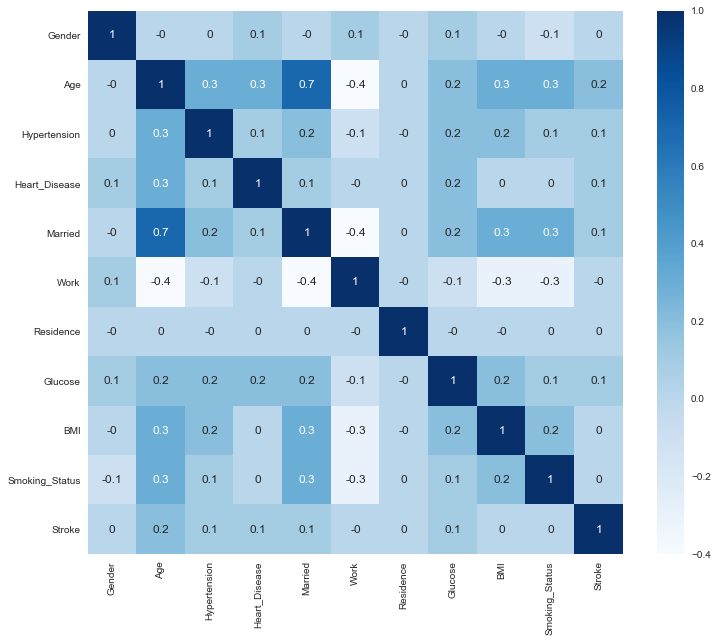

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data1.corr()
sns.heatmap(round(cor,1), annot=True, cmap=plt.cm.Blues)
plt.show()

None of the varaibles are so closely correlated with each other that I'd want to remove them now, for being almost identicle only one would suffice but none are too close. Marriage and age are the two most closely correlated with each other but I'm choosing to keep both because of how they impact the outcome of stroke differently. Obviously age is a major factor when it comes to the possibility of stroke but the stress of marriage or lack thereof can also play a role. 

In [16]:
# Correlation with output variable
cor = data1.corr()
cor_target = abs(cor["Stroke"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.04]
relevant_features

Age              0.245257
Hypertension     0.127904
Heart_Disease    0.134914
Married          0.108340
Glucose          0.131945
Stroke           1.000000
Name: Stroke, dtype: float64

Above I tested correlations with the target variable (Stroke) to see which features or columns might be irrelevant if they had close correlations with each other. Then I reviewed the correlations between the features and the target varaible to see which are most highly correlated with Stroke. Gender and residence were the lowest correlated features with the target variable, Stroke.

In [17]:
# Dropping columns with no relevant data in original dataset
data = data.drop(['Unnamed: 0','ID'], axis=1)
# Replacing the missing values in data BMI with the mean
na_mean(data['BMI'])

### Adjust skewed data

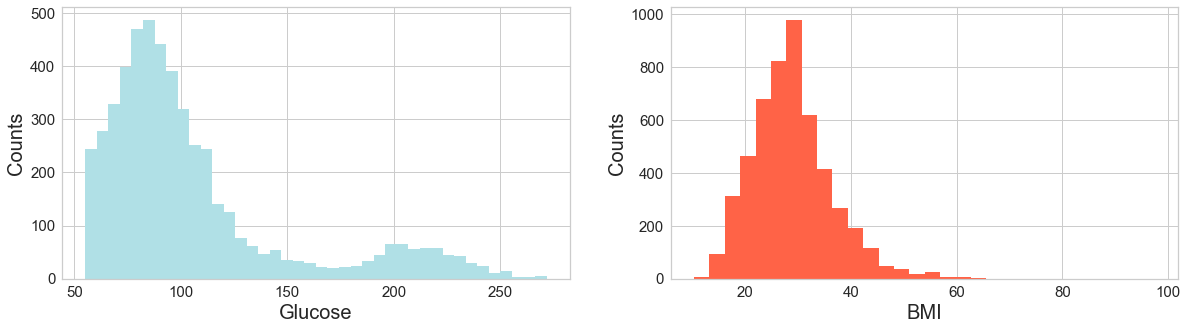

In [18]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# Make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# X axes, colors and bins
x_axes = ['Glucose', 'BMI'] # Histograms for the columns Age and Glucose
colors = ['powderblue', 'tomato']
bins = [40, 30] # Respective bin sizes

# Make the graphs
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[x_axes[idx]].dropna(), bins=bins[idx], color=colors[idx])
    ax.set_xlabel(x_axes[idx], fontsize=20)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

Here we have two variables that are right skewed so I'll adjust them using the logarithms of both of these features for transformation.

In [19]:
def log_transformation(data):
    return round(data.apply(np.log),2)

In [20]:
data['Glucose_log'] = log_transformation(data['Glucose'])
data['BMI_log'] = log_transformation(data['BMI'])

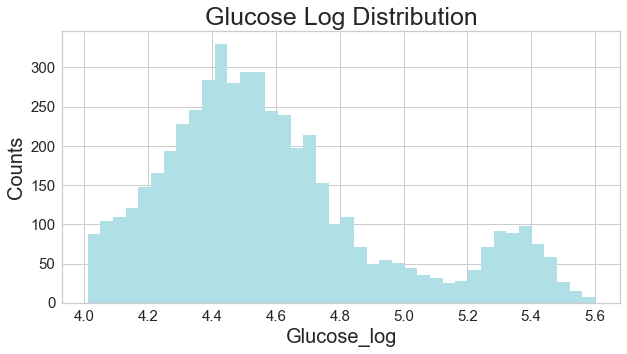

In [21]:
# Glucose log histogram
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Glucose_log'], bins=40, color='powderblue')
plt.title('Glucose Log Distribution', fontsize=25)
plt.xlabel('Glucose_log', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

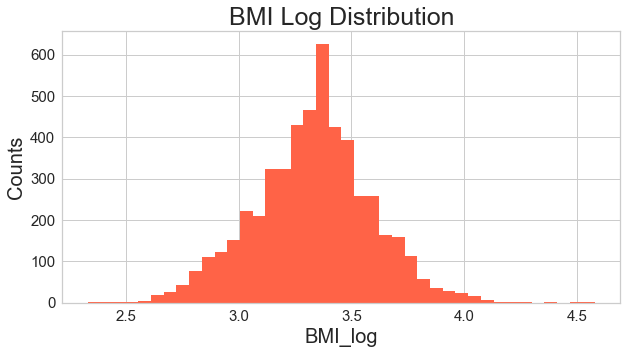

In [22]:
# BMI log histogram
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['BMI_log'], bins=40, color='tomato')
plt.title('BMI Log Distribution', fontsize=25)
plt.xlabel('BMI_log', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [23]:
data.head()

,Gender,Age,Hypertension,Heart_Disease,Married,Work,Residence,Glucose,BMI,Smoking_Status,Stroke,Glucose_log,BMI_log
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,5.43,3.60
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1,5.31,3.36
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,4.66,3.48
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,5.14,3.54
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,5.16,3.18


### Create dummy variables for categorical data

In [24]:
# categorical features list
data['Married'] = ord_enc.fit_transform(data[['Married']])
cat_features = ['Gender', 'Hypertension', 'Heart_Disease', 'Married', 'Work', 'Smoking_Status']
data_cat = data[cat_features]

# Not necessary to make dummy variables for this as it is already encoded properly
#data_cat = data_cat.replace({'Hypertension': {0: 'No', 1: 'Yes'}})
#data_cat = data_cat.replace({'Heart_Disease': {0: 'No', 1: 'Yes'}})

In [25]:
data_cat_dummies = pd.get_dummies(data_cat)

In [26]:
data_cat_dummies.head()

,Hypertension,Heart_Disease,Married,Gender_Female,Gender_Male,Gender_Other,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Smoking_Status_Unknown,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
0,0,1,1.0,0,1,0,0,0,1,0,0,0,1,0,0
1,0,0,1.0,1,0,0,0,0,0,1,0,0,0,1,0
2,0,1,1.0,0,1,0,0,0,1,0,0,0,0,1,0
3,0,0,1.0,1,0,0,0,0,1,0,0,0,0,0,1
4,1,0,1.0,1,0,0,0,0,0,1,0,0,0,1,0


# Milestone 3

Below was progress made before dealing with the imbalanced data in the data set. So the work from this milestone was commented out and then later applied to the data after dealing with the imbalanced issue.

### Logistic Regression

In [27]:
# # create a whole features dataset that can be used for train and validation data splitting
# features_model = ['Age', 'Glucose_log', 'BMI_log']
# data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)
# data_model_X.head()

In [28]:
# # create a whole target dataset that can be used for train and validation data splitting
# data_model_y = data.replace({'Stroke': {1: 'Stroke', 0: 'No_Stroke'}})['Stroke']

In [29]:
# # split the data
# X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size =0.30, random_state=11)

In [30]:
# # number of samples in each set
# print("Number of samples in training set: ", X_train.shape[0])
# print("Number of samples in validation set:", X_test.shape[0])

In [31]:
# # Stroke and no stroke (training set)
# print('Number of strokes and non strokes in the training set:')
# print(y_train.value_counts())

In [32]:
# # Survived and not-survived (testing set)
# print('Number of strokes and non strokes in the testing set:')
# print(y_test.value_counts())

In [33]:
# # Instantiate the classification model 
# model = LogisticRegression(solver='liblinear')

# #The ConfusionMatrix visualizer taxes a model
# classes = ['No Stroke','Stroke']
# cm = ConfusionMatrix(model, classes=classes)

# #Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
# cm.fit(X_train, y_train)

# #To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# #and then creates the confusion_matrix from scikit learn.
# cm.score(X_test, y_test)

# # change fontsize of the labels in the figure
# for label in cm.ax.texts:
#     label.set_size(20)

# #How did we do?
# cm.poof()

In [34]:
# # set the size of the figure and the font size 
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (15, 7)
# plt.rcParams['font.size'] = 20

# # Instantiate the visualizer
# visualizer = ClassificationReport(model, classes=classes)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# g = visualizer.poof()             # Draw/show/poof the data

### Short conclusion
Obviously logistic regression is not a great machine learning algorithm for the data set, it missed predicting literally any strokes. I'm believing it's primarily because of the lower correlation coefficients between the predictor variables and the target variable. Even though this algorithm is 95% accurate it's still lacking because of all of the strokes it failed to predict.

### Decision Tree Classifier

In [35]:
# object_type_columns = data.select_dtypes(include='object')
# le = LabelEncoder()
# for title in object_type_columns:
#     data[title] = le.fit_transform(data[title])

In [36]:
# X = data.drop(['Stroke'], axis=1)
# y = data['Stroke']

In [37]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print('absolut values for train set: ', Counter(y_train), sep='\n')
# print()
# print('in percents for train set: ', y_train.value_counts(normalize=True).round(2) * 100, sep='\n')

In [38]:
# DT_clf = tree.DecisionTreeClassifier()
# DT_clf.fit(X_train, y_train)

In [39]:
# DT_prediction = DT_clf.predict(X_test)
# DT_metrics = metrics.f1_score(y_test, DT_prediction).round(2)
# DT_report = metrics.classification_report(y_test, DT_prediction)

In [40]:
# #The ConfusionMatrix visualizer taxes a model
# classes = ['No Stroke','Stroke']
# cm = ConfusionMatrix(DT_clf, classes=classes)

# #Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
# cm.fit(X_train, y_train)

# #To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# #and then creates the confusion_matrix from scikit learn.
# cm.score(X_test, y_test)

# # change fontsize of the labels in the figure
# for label in cm.ax.texts:
#     label.set_size(20)

# #How did we do?
# cm.poof()

In [41]:
# print(DT_report)

## Short conclusion

While logistic regression may have a higher accuracy rate I actually like the results from the decision tree more because it caught more of the strokes than logistic regression. Even though there are more false positives I believe in this case it would be better to stick with the lower accuracy but be able to predict more of the strokes. I will try to tune this machine learning algorithm in turn to possibly increase the accuracy. After all at least this ML algorithm predicted strokes at all. 

# Milestone 4

## Dealing with Imbalanced Data

In [42]:
y = data.Stroke

df_majority = data[data.Stroke==0]
df_minority = data[data.Stroke==1]

nclass0 = len(df_majority)
print("Number of cases with no stroke:", nclass0)
nclass1 = len(df_minority)
print("Number of cases with a stroke:", nclass1)

Number of cases with no stroke: 4861
Number of cases with a stroke: 249


As we can see the classes are very imbalanced so I will correct this by downsampling the cases with no stroke. 

In [43]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=751)     # to match minority class

In [44]:
ds_df = pd.concat([df_majority_downsampled, df_minority])
ds_df

,Gender,Age,Hypertension,Heart_Disease,Married,Work,Residence,Glucose,BMI,Smoking_Status,Stroke,Glucose_log,BMI_log
4017,Female,44.0,0,0,1.0,Private,Rural,110.41,30.50,smokes,0,4.70,3.42
2901,Male,50.0,0,0,0.0,Govt_job,Rural,121.17,25.50,formerly smoked,0,4.80,3.24
3417,Female,80.0,1,0,1.0,Self-employed,Rural,103.60,23.70,never smoked,0,4.64,3.17
687,Female,35.0,0,0,1.0,Private,Urban,109.03,19.50,formerly smoked,0,4.69,2.97
604,Male,31.0,0,0,1.0,Private,Rural,114.32,27.70,smokes,0,4.74,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,1.0,Private,Rural,84.96,36.70,Unknown,1,4.44,3.60
245,Female,14.0,0,0,0.0,children,Rural,57.93,30.90,Unknown,1,4.06,3.43
246,Female,75.0,0,0,1.0,Self-employed,Rural,78.80,29.30,formerly smoked,1,4.37,3.38
247,Male,71.0,1,0,1.0,Self-employed,Rural,87.80,28.89,Unknown,1,4.48,3.36


## Logistic Regression

In [45]:
dsdata_cat = ds_df[cat_features]
data_cat_dummies = pd.get_dummies(dsdata_cat)

In [46]:
# create a whole features dataset that can be used for train and validation data splitting
features_model = ['Age', 'Glucose_log', 'BMI_log']
data_model_X = pd.concat([ds_df[features_model], data_cat_dummies], axis=1)
data_model_X.head()

,Age,Glucose_log,BMI_log,Hypertension,Heart_Disease,Married,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Smoking_Status_Unknown,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
4017,44.0,4.70,3.42,0,0,1.0,1,0,0,0,1,0,0,0,0,0,1
2901,50.0,4.80,3.24,0,0,0.0,0,1,1,0,0,0,0,0,1,0,0
3417,80.0,4.64,3.17,1,0,1.0,1,0,0,0,0,1,0,0,0,1,0
687,35.0,4.69,2.97,0,0,1.0,1,0,0,0,1,0,0,0,1,0,0
604,31.0,4.74,3.32,0,0,1.0,0,1,0,0,1,0,0,0,0,0,1


In [47]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = ds_df.replace({'Stroke': {1: 'Stroke', 0: 'No_Stroke'}})['Stroke']

In [48]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size =0.30, random_state=11)

In [49]:
# number of samples in each set
print("Number of samples in training set: ", X_train.shape[0])
print("Number of samples in validation set:", X_test.shape[0])

Number of samples in training set:  700
Number of samples in validation set: 300


In [50]:
# Stroke and no stroke (training set)
print('Number of strokes and non strokes in the training set:')
print(y_train.value_counts())

Number of strokes and non strokes in the training set:
No_Stroke    521
Stroke       179
Name: Stroke, dtype: int64


In [51]:
# Survived and not-survived (testing set)
print('Number of strokes and non strokes in the testing set:')
print(y_test.value_counts())

Number of strokes and non strokes in the testing set:
No_Stroke    230
Stroke        70
Name: Stroke, dtype: int64


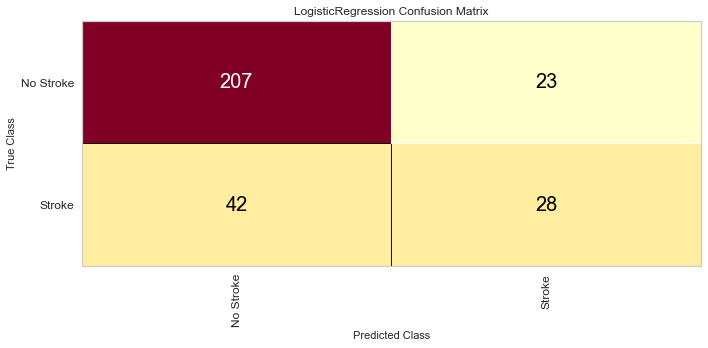

In [52]:
# Instantiate the classification model 
model = LogisticRegression(solver='liblinear')

#The ConfusionMatrix visualizer taxes a model
classes = ['No Stroke','Stroke']
cm = ConfusionMatrix(model, classes=classes)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

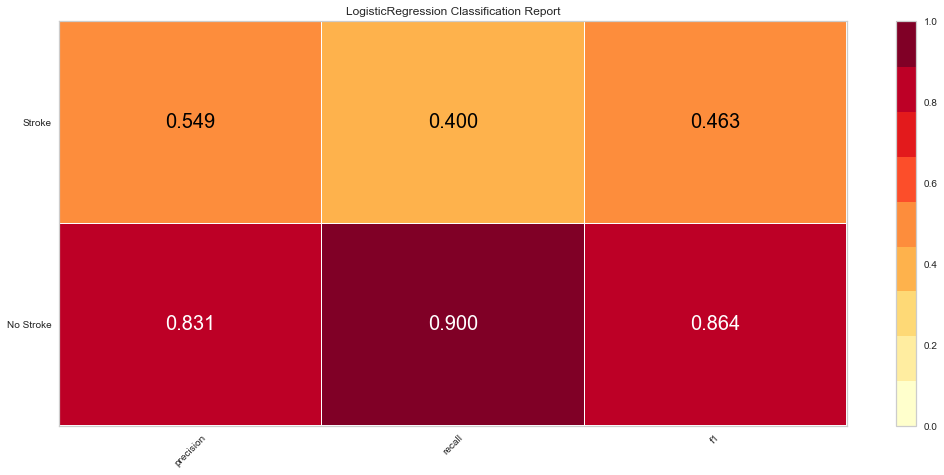

In [53]:
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## Decision Tree Classifier

In [54]:
object_type_columns = ds_df.select_dtypes(include='object')
le = LabelEncoder()
for title in object_type_columns:
    ds_df[title] = le.fit_transform(ds_df[title])

In [55]:
X = ds_df.drop(['Stroke'], axis=1)
y = ds_df['Stroke']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('absolut values for train set: ', Counter(y_train), sep='\n')
print()
print('in percents for train set: ', y_train.value_counts(normalize=True).round(2) * 100, sep='\n')

absolut values for train set: 
Counter({0: 526, 1: 174})

in percents for train set: 
0    75.0
1    25.0
Name: Stroke, dtype: float64


In [57]:
DT_clf = tree.DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
DT_prediction = DT_clf.predict(X_test)
DT_metrics = metrics.f1_score(y_test, DT_prediction).round(2)
DT_report = metrics.classification_report(y_test, DT_prediction)

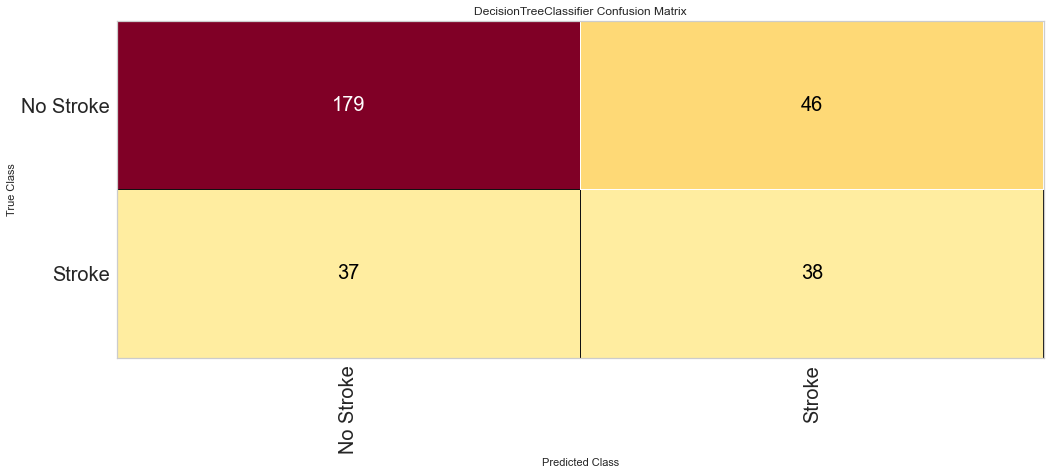

In [59]:
#The ConfusionMatrix visualizer taxes a model
classes = ['No Stroke','Stroke']
cm = ConfusionMatrix(DT_clf, classes=classes)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

In [60]:
print(DT_report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       225
           1       0.45      0.51      0.48        75

    accuracy                           0.72       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.73      0.72      0.73       300



Now the the imbalanced issue is dealt with, working toward tuning the machine learning algorithm will be slightly easier. The logistic regression algorithm is no longer predicting 0 strokes which is a good sign. For the next milestone I will try tuning the algorithms to increase precision of the target variable.